# Help Code

In [2]:
import numpy as np
from scipy.special import comb
import matplotlib.pyplot as plt

from scipy.stats import multinomial
from numpy import math 

def fact(x):
    return math.factorial(x)
    
def Entropy(probs):
  entropy = 0
  for i in range(len(probs)):
      if probs[i] != 0:
          entropy -= probs[i] * np.log2(probs[i])
  return round(entropy,3)

def KL_distance(Pprobs,Qprobs):
  distance = 0
  if 0 in Qprobs:
      return float('inf')
  for i in range(len(Pprobs)):
      if Pprobs[i] != 0:
          distance += Pprobs[i] * np.log2(Pprobs[i] / Qprobs[i])
  return round(distance,3)
  
def Entropy_rate(probs, stationary_dist):
    rate = 0
    for i in range(len(probs)):
        if probs[i] != 0:
            rate -= stationary_dist[i] * probs[i] * np.log2(probs[i])
    return round(rate,3)

# Άσκηση 1



0.469
maximum = 4.600239408398999
maximum π = 0.17171717171717174


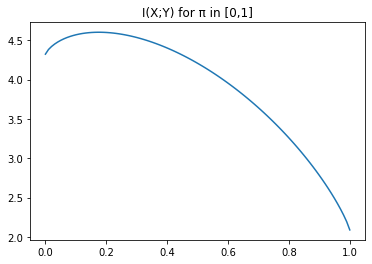

In [41]:
y_given_x = Entropy([1/10,9/10])
x = np.linspace(0,1,100)
y = []
for p in x:
    H_Y = 0
    if (1 - p > 0):
        H_Y -= 20 * (1-p) / 20 * np.log2((1-p) / 20)
    if (p > 0):
        H_Y -= 5  * 9 * p / 50 * np.log2(9 * p / 50)
        H_Y -= 1  * 5 * p / 50 * np.log2(5 * p / 50)
    y.append(H_Y - p * y_given_x)
print(y_given_x)
print("maximum =",np.amax(y))
print("maximum π =",x[np.argmax(y)])
plt.title("I(X;Y) for π in [0,1]")

plt.plot(x,y)
plt.show()

# Άσκηση 2



maximum = 0.6715361536153616
maximum π = 0.46384638463846384


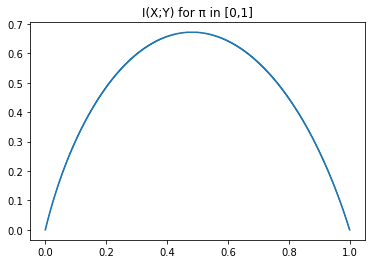

In [43]:
x = np.linspace(0,1,10000)
a1 = .1
a2 = .15
p1 = .05
p2 = .02

y = []
for p in x:
    H_Y_X = p * Entropy([1-a1-p1,a1,p1]) + (1-p) * Entropy([1-a2-p2,a2,p2])
    Y_0 = p * (1 - a1 - p1) + (1 - p) * p2 
    Y_1 = p * p1 + (1 - p) * (1 - a2 - p2) 
    Y_e = p * a1 + (1 - p) * a2
    H_Y = Entropy([Y_0,Y_1,Y_e])    
    
    y.append(H_Y - H_Y_X)

print("maximum =",np.amax(y))
print("maximum π =",x[np.argmax(y)])
plt.title("I(X;Y) for π in [0,1]")
plt.plot(x,y)
# plt.scatter(x[np.argmax(y)],np.amax(y))
plt.show()

# Άσκηση 3

In [14]:
probability_matrix = np.array([[.8,.1,.05,.05],[.05,.8,.05,.1],[.2,.1,.6,.1],[.1,.05,.05,.8]])
print(list(probability_matrix[:,0] / sum(probability_matrix[:,0])))
a = list(probability_matrix[:,0] / sum(probability_matrix[:,0]))
Entropy(a)
p = np.array([.5,0,.5,0])
print(np.dot(p,probability_matrix))

[0.6956521739130435, 0.043478260869565216, 0.17391304347826086, 0.08695652173913043]
[0.5   0.1   0.325 0.075]


In [45]:
import scipy
from scipy.optimize import LinearConstraint

def max_fun(p_x):
    probability_matrix = np.array([[.8,.1,.05,.05],[.05,.8,.05,.1],[.2,.1,.6,.1],[.1,.05,.05,.8]])
    p_y = np.dot(np.array(p_x),probability_matrix)
    I_X_Y = 0
    H_Y = Entropy(list(p_y))
    H_Y_X = 0
    for i in range(4):
        H_Y_X += p_x[i] * Entropy(list(probability_matrix[i,:] / sum(probability_matrix[i,:])))
    return -1 * (H_Y - H_Y_X)


linear_constraint = LinearConstraint(np.ones(4), [1], [1])

a = scipy.optimize.minimize(max_fun,[1/4,1/4,1/4,1/4],bounds=((0,1),(0,1),(0,1),(0,1)),constraints=linear_constraint)
print("Best parameters for the optimization problem",a.x[0],a.x[1],a.x[2],a.x[3],)

Capacity = -1 * max_fun(a.x)
print("Uniform Capacity",-1 * max_fun([1/4,1/4,1/4,1/4]))
print("Capacity", Capacity)


Best parameters for the optimization problem 0.2801639435908615 0.2801639435908615 0.15950816922742922 0.2801639435908615
Uniform Capacity 0.82375
Capacity 0.8354300150941274
